## Data Preprocessing

### Importing the dataset

In [32]:
import pandas as pd


# Step 1: Read the CSV file with appropriate parameters
df = pd.read_csv('../data/movie_dataset.csv')

dataset = df.head(500)
print(dataset)

summary_statictics = dataset.describe(include='all')

print(summary_statictics)

     index     budget                                    genres  \
0        0  237000000  Action Adventure Fantasy Science Fiction   
1        1  300000000                  Adventure Fantasy Action   
2        2  245000000                    Action Adventure Crime   
3        3  250000000               Action Crime Drama Thriller   
4        4  260000000          Action Adventure Science Fiction   
..     ...        ...                                       ...   
495    495   79000000          Adventure Action Science Fiction   
496    496   78000000                   Animation Family Comedy   
497    497   78000000                     Crime Thriller Horror   
498    498  100000000                         Western Adventure   
499    499   79000000                                    Comedy   

                                         homepage      id  \
0                     http://www.avatarmovie.com/   19995   
1    http://disney.go.com/disneypictures/pirates/     285   
2     http:/

## Visualising data

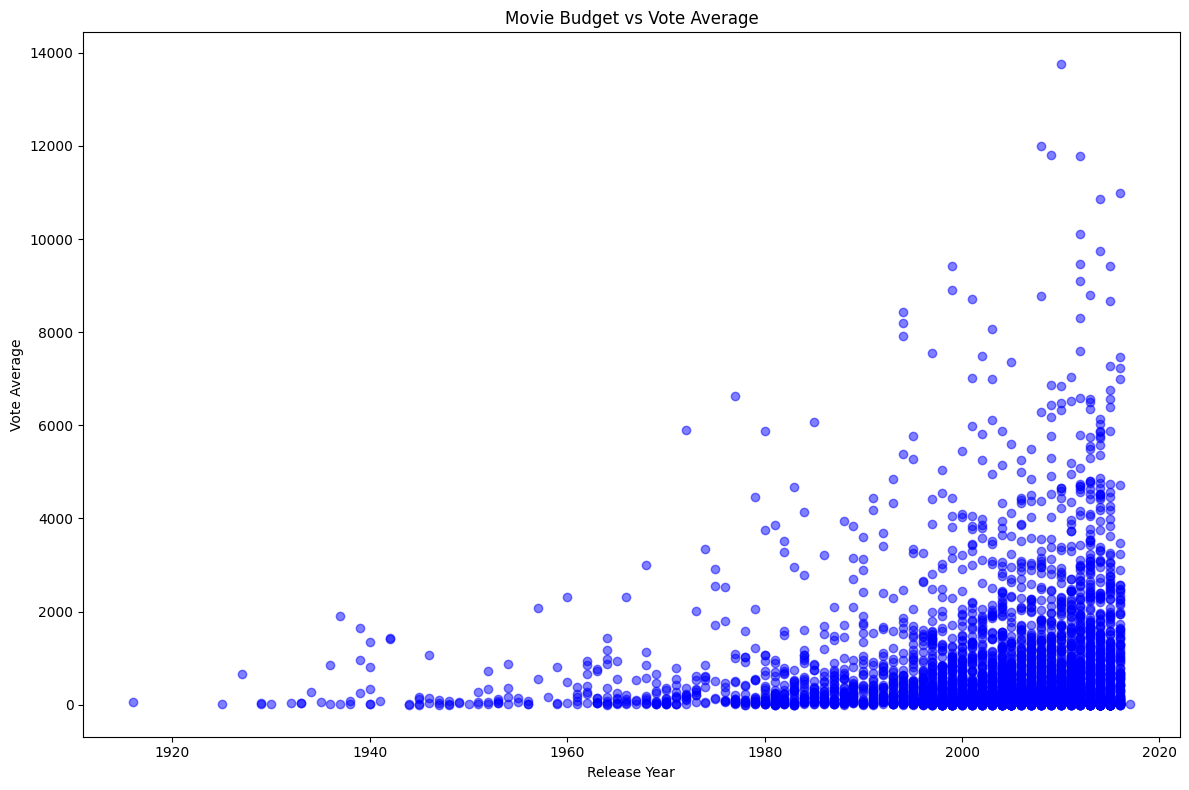

In [56]:
import matplotlib.pyplot as plt

df['release_date'] = pd.to_datetime(df['release_date'], format='%Y/%m/%d')
df['release_year'] = df['release_date'].dt.year

plt.figure(figsize=(12, 8))
plt.scatter(df['release_year'], df['vote_count'], color='blue', alpha=0.5)
plt.xlabel('Release Year')
plt.ylabel('Vote Average')
plt.title('Movie Budget vs Vote Average')
# plt.xscale('log')  # Optional: Use logarithmic scale for better visualization if there are large ranges
# plt.yscale('log')  # Optional: Use logarithmic scale for better visualization if there are large ranges
plt.tight_layout()
plt.show()

### Setting independent and dependent variables and removing irrelevant columns

In [56]:
X = dataset.drop(dataset.columns[[3, 16, 17, 19]], axis=1).values
y = dataset.iloc[:, 19].values
print(y)

[7.2 6.9 6.3 ... 7.  5.7 6.3]


### Filling in missing data

In [66]:
import numpy as np
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Select only numeric columns for imputation

numeric_columns = [1, 3, 8, 12, 13, 16]
print(X[:, 16])

for i in numeric_columns:
    
    X[:, i] = imputer.fit_transform(X[:, i].reshape(-1, 1)).flatten()

print(X)

# imputer.fit(X[:, numeric_columns])
# X[:, numeric_columns] = imputer.transform(X[:, numeric_columns])

[11800 4500 4466 ... 6 7 16]
[[0 237000000.0 'Action Adventure Fantasy Science Fiction' ...
  'Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez'
  '[{\'name\': \'Stephen E. Rivkin\', \'gender\': 0, \'department\': \'Editing\', \'job\': \'Editor\', \'credit_id\': \'52fe48009251416c750aca23\', \'id\': 1721}, {\'name\': \'Rick Carter\', \'gender\': 2, \'department\': \'Art\', \'job\': \'Production Design\', \'credit_id\': \'539c47ecc3a36810e3001f87\', \'id\': 496}, {\'name\': \'Christopher Boyes\', \'gender\': 0, \'department\': \'Sound\', \'job\': \'Sound Designer\', \'credit_id\': \'54491c89c3a3680fb4001cf7\', \'id\': 900}, {\'name\': \'Christopher Boyes\', \'gender\': 0, \'department\': \'Sound\', \'job\': \'Supervising Sound Editor\', \'credit_id\': \'54491cb70e0a267480001bd0\', \'id\': 900}, {\'name\': \'Mali Finn\', \'gender\': 1, \'department\': \'Production\', \'job\': \'Casting\', \'credit_id\': \'539c4a4cc3a36810c9002101\', \'id\': 1262}, {\'name\': \

### Encoding the data

#### Encoding the Independent Variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# encoding_indices = [2, 4, 6, 9, 10, 15, 17, 18, 19]
encoding_indices = [0, 2, 4, 5, 6, 9, 10, 15, 17, 18, 19]
print(X[:, 6])

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), encoding_indices)], remainder='passthrough')

X = ct.fit_transform(X)
print(X)

encoded_df = pd.DataFrame(X, columns=ct.get_feature_names_out())
summary_statistics = encoded_df.describe(include='all')
print(summary_statictics)



[0.0 1.0 0.0 ... 0.0 0.0 0.0]
[[0.0 1.0 1.0 ...
  'Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez'
  '[{\'name\': \'Stephen E. Rivkin\', \'gender\': 0, \'department\': \'Editing\', \'job\': \'Editor\', \'credit_id\': \'52fe48009251416c750aca23\', \'id\': 1721}, {\'name\': \'Rick Carter\', \'gender\': 2, \'department\': \'Art\', \'job\': \'Production Design\', \'credit_id\': \'539c47ecc3a36810e3001f87\', \'id\': 496}, {\'name\': \'Christopher Boyes\', \'gender\': 0, \'department\': \'Sound\', \'job\': \'Sound Designer\', \'credit_id\': \'54491c89c3a3680fb4001cf7\', \'id\': 900}, {\'name\': \'Christopher Boyes\', \'gender\': 0, \'department\': \'Sound\', \'job\': \'Supervising Sound Editor\', \'credit_id\': \'54491cb70e0a267480001bd0\', \'id\': 900}, {\'name\': \'Mali Finn\', \'gender\': 1, \'department\': \'Production\', \'job\': \'Casting\', \'credit_id\': \'539c4a4cc3a36810c9002101\', \'id\': 1262}, {\'name\': \'James Horner\', \'gender\': 2, \'department